In [ ]:
# calculate inception score with Keras
from math import floor
from numpy import ones
from numpy import expand_dims
from numpy import log
from numpy import mean
from numpy import std
from numpy import exp
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
 
# assumes images have the shape 299x299x3, pixels in [0,255]
def calculate_inception_score(images, n_split=10, eps=1E-16):
	# load inception v3 model
	model = InceptionV3()
	# convert from uint8 to float32
	processed = images.astype('float32')
	# pre-process raw images for inception v3 model
	processed = preprocess_input(processed)
	# predict class probabilities for images
	yhat = model.predict(processed)
	# enumerate splits of images/predictions
	scores = list()
	n_part = floor(images.shape[0] / n_split)
	for i in range(n_split):
		# retrieve p(y|x)
		ix_start, ix_end = i * n_part, i * n_part + n_part
		p_yx = yhat[ix_start:ix_end]
		# calculate p(y)
		p_y = expand_dims(p_yx.mean(axis=0), 0)
		# calculate KL divergence using log probabilities
		kl_d = p_yx * (log(p_yx + eps) - log(p_y + eps))
		# sum over classes
		sum_kl_d = kl_d.sum(axis=1)
		# average over images
		avg_kl_d = mean(sum_kl_d)
		# undo the log
		is_score = exp(avg_kl_d)
		# store
		scores.append(is_score)
	# average across images
	is_avg, is_std = mean(scores), std(scores)
	return is_avg, is_std
 
# pretend to load images
images = ones((50, 299, 299, 3))
print('loaded', images.shape)
# calculate inception score
is_avg, is_std = calculate_inception_score(images)
print('score', is_avg, is_std)

loaded (50, 299, 299, 3)
96124928/96112376 [==============================] - 1s 0us/step
score 1.0 0.0


In [ ]:
# Load cifar10 images

In [ ]:
from math import floor
from numpy import ones
from numpy import expand_dims
from numpy import log
from numpy import mean
from numpy import std
from numpy import exp
from numpy.random import shuffle
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.datasets import cifar10
from skimage.transform import resize
from numpy import asarray
 
# scale an array of images to a new size
def scale_images(images, new_shape):
	images_list = list()
	for image in images:
		# resize with nearest neighbor interpolation
		new_image = resize(image, new_shape, 0)
		# store
		images_list.append(new_image)
	return asarray(images_list)
 
# assumes images have any shape and pixels in [0,255]
def calculate_inception_score(images, n_split=10, eps=1E-16):
	# load inception v3 model
	model = InceptionV3()
	# enumerate splits of images/predictions
	scores = list()
	n_part = floor(images.shape[0] / n_split)
	for i in range(n_split):
		# retrieve images
		ix_start, ix_end = i * n_part, (i+1) * n_part
		subset = images[ix_start:ix_end]
		# convert from uint8 to float32
		subset = subset.astype('float32')
		# scale images to the required size
		subset = scale_images(subset, (299,299,3))
		# pre-process images, scale to [-1,1]
		subset = preprocess_input(subset)
		# predict p(y|x)
		p_yx = model.predict(subset)
		# calculate p(y)
		p_y = expand_dims(p_yx.mean(axis=0), 0)
		# calculate KL divergence using log probabilities
		kl_d = p_yx * (log(p_yx + eps) - log(p_y + eps))
		# sum over classes
		sum_kl_d = kl_d.sum(axis=1)
		# average over images
		avg_kl_d = mean(sum_kl_d)
		# undo the log
		is_score = exp(avg_kl_d)
		# store
		scores.append(is_score)
	# average across images
	is_avg, is_std = mean(scores), std(scores)
	return is_avg, is_std
 
# load cifar10 images
(images, _), (_, _) = cifar10.load_data()
# shuffle images
shuffle(images)
print('loaded', images.shape)
# calculate inception score
is_avg, is_std = calculate_inception_score(images)
print('score', is_avg, is_std)

In [ ]:
# DEMO LOAD IMAGES

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
labels = []
label_dir = '/content/drive/MyDrive/Naive_Bayes/Ronaldo'


In [ ]:
import glob
import numpy as np

from PIL import Image

for label in sorted(glob.glob(os.path.join(label_dir, "*.jpg"))):
    img_label = Image.open(label)
    labels.append(np.asarray(img_label))

In [ ]:
print(labels[0].shape)


(450, 600, 3)


In [ ]:
for a in labels:
  print(a.shape)

(450, 600, 3)
(728, 1222, 3)
(360, 640, 3)
(183, 275, 3)
(450, 600, 3)
(450, 600, 3)
(728, 1222, 3)
(360, 640, 3)
(183, 275, 3)


In [ ]:
len(labels)

9

In [ ]:
# LINK LOAD IMAGE (https://machinelearningmastery.com/how-to-load-and-manipulate-images-for-deep-learning-in-python-with-pil-pillow/)

In [ ]:
#@title MAIN PROGRAM
# Main Program

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
imges = []
images_dir = '/content/drive/MyDrive/output2310/37/37/output'

In [ ]:
import glob
import os
import numpy as np

from PIL import Image

for image in sorted(glob.glob(os.path.join(images_dir, "*.jpg"))):
    img_label = Image.open(image)
    imges.append(np.asarray(img_label))

In [ ]:
print(imges[0].shape)

(256, 192, 3)


In [ ]:
import numpy as np
print(np.asarray(imges).shape)

(51, 256, 192, 3)


In [ ]:
from math import floor
from numpy import ones
from numpy import expand_dims
from numpy import log
from numpy import mean
from numpy import std
from numpy import exp
from numpy.random import shuffle
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.datasets import cifar10
from skimage.transform import resize
from numpy import asarray
 
# scale an array of images to a new size
def scale_images(images, new_shape):
	images_list = list()
	for image in images:
		# resize with nearest neighbor interpolation
		new_image = resize(image, new_shape, 0)
		# store
		images_list.append(new_image)
	return asarray(images_list)
 
# assumes images have any shape and pixels in [0,255]
def calculate_inception_score(images, n_split=10, eps=1E-16):
	# load inception v3 model
	model = InceptionV3()
	# enumerate splits of images/predictions
	scores = list()
	n_part = floor(images.shape[0] / n_split)
	for i in range(n_split):
		# retrieve images
		ix_start, ix_end = i * n_part, (i+1) * n_part
		subset = images[ix_start:ix_end]
		# convert from uint8 to float32
		subset = subset.astype('float32')
		# scale images to the required size
		subset = scale_images(subset, (299,299,3))
		# pre-process images, scale to [-1,1]
		subset = preprocess_input(subset)
		# predict p(y|x)
		p_yx = model.predict(subset)
		# calculate p(y)
		p_y = expand_dims(p_yx.mean(axis=0), 0)
		# calculate KL divergence using log probabilities
		kl_d = p_yx * (log(p_yx + eps) - log(p_y + eps))
		# sum over classes
		sum_kl_d = kl_d.sum(axis=1)
		# average over images
		avg_kl_d = mean(sum_kl_d)
		# undo the log
		is_score = exp(avg_kl_d)
		# store
		scores.append(is_score)
	# average across images
	is_avg, is_std = mean(scores), std(scores)
	return is_avg, is_std
 
# load cifar10 images
#(images, _), (_, _) = cifar10.load_data()
# shuffle images
#shuffle(images)
images = np.asarray(imges)
print('loaded', images.shape)
# calculate inception score
is_avg, is_std = calculate_inception_score(images)
print("IS for K_37")
print('Score AVG', is_avg)
print('Score STD', is_std)

loaded (51, 256, 192, 3)
96124928/96112376 [==============================] - 1s 0us/step
IS for K_37
Score AVG 1.0655476
Score STD 0.07341154


In [ ]:
import glob
import os
import numpy as np

from PIL import Image

imges = []
images_dir = '/content/drive/MyDrive/output2310/94/94/output'


for image in sorted(glob.glob(os.path.join(images_dir, "*.jpg"))):
    img_label = Image.open(image)
    imges.append(np.asarray(img_label))

from math import floor
from numpy import ones
from numpy import expand_dims
from numpy import log
from numpy import mean
from numpy import std
from numpy import exp
from numpy.random import shuffle
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.datasets import cifar10
from skimage.transform import resize
from numpy import asarray
 
# scale an array of images to a new size
def scale_images(images, new_shape):
	images_list = list()
	for image in images:
		# resize with nearest neighbor interpolation
		new_image = resize(image, new_shape, 0)
		# store
		images_list.append(new_image)
	return asarray(images_list)
 
# assumes images have any shape and pixels in [0,255]
def calculate_inception_score(images, n_split=10, eps=1E-16):
	# load inception v3 model
	model = InceptionV3()
	# enumerate splits of images/predictions
	scores = list()
	n_part = floor(images.shape[0] / n_split)
	for i in range(n_split):
		# retrieve images
		ix_start, ix_end = i * n_part, (i+1) * n_part
		subset = images[ix_start:ix_end]
		# convert from uint8 to float32
		subset = subset.astype('float32')
		# scale images to the required size
		subset = scale_images(subset, (299,299,3))
		# pre-process images, scale to [-1,1]
		subset = preprocess_input(subset)
		# predict p(y|x)
		p_yx = model.predict(subset)
		# calculate p(y)
		p_y = expand_dims(p_yx.mean(axis=0), 0)
		# calculate KL divergence using log probabilities
		kl_d = p_yx * (log(p_yx + eps) - log(p_y + eps))
		# sum over classes
		sum_kl_d = kl_d.sum(axis=1)
		# average over images
		avg_kl_d = mean(sum_kl_d)
		# undo the log
		is_score = exp(avg_kl_d)
		# store
		scores.append(is_score)
	# average across images
	is_avg, is_std = mean(scores), std(scores)
	return is_avg, is_std
 
# load cifar10 images
#(images, _), (_, _) = cifar10.load_data()
# shuffle images
#shuffle(images)
images = np.asarray(imges)
print('loaded', images.shape)
# calculate inception score
is_avg, is_std = calculate_inception_score(images)
print("IS for K_94")
print('Score AVG', is_avg)
print('Score STD', is_std)

loaded (51, 256, 192, 3)
IS for K_94
Score AVG 1.7400067
Score STD 0.23013231


In [ ]:
import glob
import os
import numpy as np

from PIL import Image

imges = []
images_dir = '/content/drive/MyDrive/37/F_37_51/try-on'


for image in sorted(glob.glob(os.path.join(images_dir, "*.png"))):
    img_label = Image.open(image)
    imges.append(np.asarray(img_label))

from math import floor
from numpy import ones
from numpy import expand_dims
from numpy import log
from numpy import mean
from numpy import std
from numpy import exp
from numpy.random import shuffle
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.datasets import cifar10
from skimage.transform import resize
from numpy import asarray
 
# scale an array of images to a new size
def scale_images(images, new_shape):
	images_list = list()
	for image in images:
		# resize with nearest neighbor interpolation
		new_image = resize(image, new_shape, 0)
		# store
		images_list.append(new_image)
	return asarray(images_list)
 
# assumes images have any shape and pixels in [0,255]
def calculate_inception_score(images, n_split=10, eps=1E-16):
	# load inception v3 model
	model = InceptionV3()
	# enumerate splits of images/predictions
	scores = list()
	n_part = floor(images.shape[0] / n_split)
	for i in range(n_split):
		# retrieve images
		ix_start, ix_end = i * n_part, (i+1) * n_part
		subset = images[ix_start:ix_end]
		# convert from uint8 to float32
		subset = subset.astype('float32')
		# scale images to the required size
		subset = scale_images(subset, (299,299,3))
		# pre-process images, scale to [-1,1]
		subset = preprocess_input(subset)
		# predict p(y|x)
		p_yx = model.predict(subset)
		# calculate p(y)
		p_y = expand_dims(p_yx.mean(axis=0), 0)
		# calculate KL divergence using log probabilities
		kl_d = p_yx * (log(p_yx + eps) - log(p_y + eps))
		# sum over classes
		sum_kl_d = kl_d.sum(axis=1)
		# average over images
		avg_kl_d = mean(sum_kl_d)
		# undo the log
		is_score = exp(avg_kl_d)
		# store
		scores.append(is_score)
	# average across images
	is_avg, is_std = mean(scores), std(scores)
	return is_avg, is_std
 
# load cifar10 images
#(images, _), (_, _) = cifar10.load_data()
# shuffle images
#shuffle(images)
images = np.asarray(imges)
print('loaded', images.shape)
# calculate inception score
is_avg, is_std = calculate_inception_score(images)
print("IS for N_37")
print('Score AVG', is_avg)
print('Score STD', is_std)

loaded (51, 256, 192, 3)
IS for N_37
Score AVG 1.1089368
Score STD 0.09688276


In [ ]:
import glob
import os
import numpy as np

from PIL import Image

imges = []
images_dir = '/content/drive/MyDrive/94/F_94_31/try-on'


for image in sorted(glob.glob(os.path.join(images_dir, "*.png"))):
    img_label = Image.open(image)
    imges.append(np.asarray(img_label))

from math import floor
from numpy import ones
from numpy import expand_dims
from numpy import log
from numpy import mean
from numpy import std
from numpy import exp
from numpy.random import shuffle
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.datasets import cifar10
from skimage.transform import resize
from numpy import asarray
 
# scale an array of images to a new size
def scale_images(images, new_shape):
	images_list = list()
	for image in images:
		# resize with nearest neighbor interpolation
		new_image = resize(image, new_shape, 0)
		# store
		images_list.append(new_image)
	return asarray(images_list)
 
# assumes images have any shape and pixels in [0,255]
def calculate_inception_score(images, n_split=10, eps=1E-16):
	# load inception v3 model
	model = InceptionV3()
	# enumerate splits of images/predictions
	scores = list()
	n_part = floor(images.shape[0] / n_split)
	for i in range(n_split):
		# retrieve images
		ix_start, ix_end = i * n_part, (i+1) * n_part
		subset = images[ix_start:ix_end]
		# convert from uint8 to float32
		subset = subset.astype('float32')
		# scale images to the required size
		subset = scale_images(subset, (299,299,3))
		# pre-process images, scale to [-1,1]
		subset = preprocess_input(subset)
		# predict p(y|x)
		p_yx = model.predict(subset)
		# calculate p(y)
		p_y = expand_dims(p_yx.mean(axis=0), 0)
		# calculate KL divergence using log probabilities
		kl_d = p_yx * (log(p_yx + eps) - log(p_y + eps))
		# sum over classes
		sum_kl_d = kl_d.sum(axis=1)
		# average over images
		avg_kl_d = mean(sum_kl_d)
		# undo the log
		is_score = exp(avg_kl_d)
		# store
		scores.append(is_score)
	# average across images
	is_avg, is_std = mean(scores), std(scores)
	return is_avg, is_std
 
# load cifar10 images
#(images, _), (_, _) = cifar10.load_data()
# shuffle images
#shuffle(images)
images = np.asarray(imges)
print('loaded', images.shape)
# calculate inception score
is_avg, is_std = calculate_inception_score(images)
print("IS for N_94")
print('Score AVG', is_avg)
print('Score STD', is_std)

loaded (51, 256, 192, 3)
IS for N_94
Score AVG 1.4677765
Score STD 0.11571918


In [ ]:
######### FINAL PROGRAM

In [ ]:
import glob
import os
import numpy as np

from PIL import Image

imges = []
images_dir = '/content/drive/MyDrive/TRY_ON/K-TRY_ON/mask'


for image in sorted(glob.glob(os.path.join(images_dir, "*.jpg"))):
    img_label = Image.open(image)
    imges.append(np.asarray(img_label))

from math import floor
from numpy import ones
from numpy import expand_dims
from numpy import log
from numpy import mean
from numpy import std
from numpy import exp
from numpy.random import shuffle
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.datasets import cifar10
from skimage.transform import resize
from numpy import asarray
 
# scale an array of images to a new size
def scale_images(images, new_shape):
	images_list = list()
	for image in images:
		# resize with nearest neighbor interpolation
		new_image = resize(image, new_shape, 0)
		# store
		images_list.append(new_image)
	return asarray(images_list)
 
# assumes images have any shape and pixels in [0,255]
def calculate_inception_score(images, n_split=10, eps=1E-16):
	# load inception v3 model
	model = InceptionV3()
	# enumerate splits of images/predictions
	scores = list()
	n_part = floor(images.shape[0] / n_split)
	for i in range(n_split):
		# retrieve images
		ix_start, ix_end = i * n_part, (i+1) * n_part
		subset = images[ix_start:ix_end]
		# convert from uint8 to float32
		subset = subset.astype('float32')
		# scale images to the required size
		subset = scale_images(subset, (299,299,3))
		# pre-process images, scale to [-1,1]
		subset = preprocess_input(subset)
		# predict p(y|x)
		p_yx = model.predict(subset)
		# calculate p(y)
		p_y = expand_dims(p_yx.mean(axis=0), 0)
		# calculate KL divergence using log probabilities
		kl_d = p_yx * (log(p_yx + eps) - log(p_y + eps))
		# sum over classes
		sum_kl_d = kl_d.sum(axis=1)
		# average over images
		avg_kl_d = mean(sum_kl_d)
		# undo the log
		is_score = exp(avg_kl_d)
		# store
		scores.append(is_score)
	# average across images
	is_avg, is_std = mean(scores), std(scores)
	return is_avg, is_std
 
# load cifar10 images
#(images, _), (_, _) = cifar10.load_data()
# shuffle images
#shuffle(images)
images = np.asarray(imges)
print('loaded', images.shape)
# calculate inception score
is_avg, is_std = calculate_inception_score(images)
print("IS for N_94")
print('Score AVG', is_avg)
print('Score STD', is_std)

loaded (1773, 256, 192, 3)
96124928/96112376 [==============================] - 2s 0us/step
IS for N_94
Score AVG 3.3463943
Score STD 0.1995817


In [7]:
import glob
import os
import numpy as np

from PIL import Image

imges = []
images_dir = '/content/drive/MyDrive/TRY_ON/K-TRY_ON/mask'


for image in sorted(glob.glob(os.path.join(images_dir, "*.jpg"))):
    img_label = Image.open(image)
    imges.append(np.asarray(img_label))

from math import floor
from numpy import ones
from numpy import expand_dims
from numpy import log
from numpy import mean
from numpy import std
from numpy import exp
from numpy.random import shuffle
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.datasets import cifar10
from skimage.transform import resize
from numpy import asarray
 
scores = list()

# scale an array of images to a new size
def scale_images(images, new_shape):
	images_list = list()
	for image in images:
		# resize with nearest neighbor interpolation
		new_image = resize(image, new_shape, 0)
		# store
		images_list.append(new_image)
	return asarray(images_list)
 
# assumes images have any shape and pixels in [0,255]
def calculate_inception_score(images, n_split=20, eps=1E-16):
	# load inception v3 model
	model = InceptionV3()
	# enumerate splits of images/predictions
	# scores = list()
	n_part = floor(images.shape[0] / n_split)
	for i in range(n_split):
		# retrieve images
		ix_start, ix_end = i * n_part, (i+1) * n_part
		subset = images[ix_start:ix_end]
		# convert from uint8 to float32
		subset = subset.astype('float32')
		# scale images to the required size
		subset = scale_images(subset, (299,299,3))
		# pre-process images, scale to [-1,1]
		subset = preprocess_input(subset)
		# predict p(y|x)
		p_yx = model.predict(subset)
		# calculate p(y)
		p_y = expand_dims(p_yx.mean(axis=0), 0)
		# calculate KL divergence using log probabilities
		kl_d = p_yx * (log(p_yx + eps) - log(p_y + eps))
		# sum over classes
		sum_kl_d = kl_d.sum(axis=1)
		# average over images
		avg_kl_d = mean(sum_kl_d)
		# undo the log
		is_score = exp(avg_kl_d)
		# store
		scores.append(is_score)
	# average across images
	is_avg, is_std = mean(scores), std(scores)
	return is_avg, is_std
 
# load cifar10 images
#(images, _), (_, _) = cifar10.load_data()
# shuffle images
#shuffle(images)
images = np.asarray(imges)
print('loaded', images.shape)
# calculate inception score
is_avg, is_std = calculate_inception_score(images)
print("IS for N_94")
print('Score AVG', is_avg)
print('Score STD', is_std)



loaded (1773, 256, 192, 3)
IS for N_94
Score AVG 3.2674584
Score STD 0.2258682


In [9]:
print(len(data))

20


In [10]:
print(data[0])
print(data[1])
print(data[2])
print(data[3])
print(data[4])
print(data[5])
print(data[6])
print(data[7])
print(data[8])
print(data[9])
print(data[10])
print(data[11])
print(data[12])
print(data[13])
print(data[14])
print(data[15])
print(data[16])
print(data[17])
print(data[18])
print(data[19])



3.7919438
3.3301656
3.389827
3.1650805
3.3392582
3.0971797
2.920871
2.9236994
3.1790504
3.5177116
3.6837409
3.4397178
3.2848988
3.1970227
3.2917259
3.3039243
3.055762
2.924468
3.2645097
3.2486


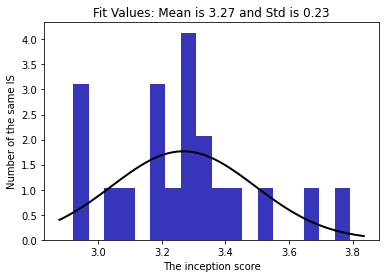

In [19]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
  
# Generate some data for this 
# demonstration.
# data = np.random.normal(170, 10, 250)
data = scores 
  
# Fit a normal distribution to
# the data:
# mean and standard deviation
mu, std = norm.fit(data) 
  
# Plot the histogram.
plt.hist(data, bins=18, density=True, alpha=0.8, color='#0504aa')
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: Mean is {:.2f} and Std is {:.2f}".format(mu, std)
plt.title(title)

plt.xlabel('The inception score',fontsize=10)
plt.ylabel('Number of the same IS',fontsize=10)
  
plt.show()